<a href="https://colab.research.google.com/github/xristey12/Housing-Price-Prediction/blob/main/housing_price_prediction_OIM7507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SECTION A

IMPORT PACKAGES

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
from tabulate import tabulate

MAKE REGRESSION PLOT

In [ ]:
def make_plot(truth, prediction):
  plt.plot(truth, color="yellow", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

READ CSV FILE AND CREATE PANDAS DATA FRAME

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/msc_training_dataset.csv')
test = pd.read_csv('/content/drive/MyDrive/msc_testing_dataset.csv')

A GLIMPSE OF THE DATASETS

In [ ]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [ ]:
print("Train data shape:", train.shape)

Train data shape: (3000, 12)


In [ ]:
print("Test data shape:", test.shape)

Test data shape: (999, 12)


In [ ]:
train.isnull().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

SECTION B- DATA EXPLORATION

DESCRIBE THE DATASETS

In [ ]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


Text(0.5, 1.0, 'Housing price distribution')

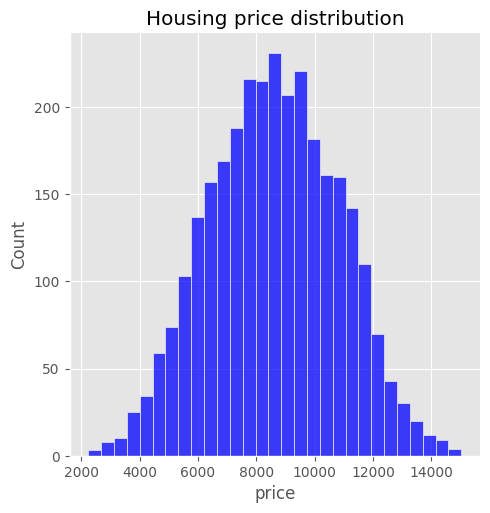

In [ ]:
sns.displot(train["price"], kind="hist", color="blue")
plt.title("Housing price distribution")

In [ ]:
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


SECTION C- MODEL BUILDING

DROP THE TARGET VARIABLE

In [ ]:
train_X = train.drop('price', axis=1)
test_X = test.drop('price', axis=1)
train_Y = train['price']
test_Y = test['price']

In [ ]:
train_X.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


In [ ]:
train_Y

0       6835
1       9005
2       9005
3       5105
4       9105
        ... 
2995    4825
2996    6755
2997    7565
2998    9135
2999    8955
Name: price, Length: 3000, dtype: int64

BUILD A LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_Y)

In [ ]:
reg

LinearRegression()

In [ ]:
predicted = reg.predict(test_X)

SECTION D: COMPUTATION OF PERFORMANCE METRICS AND FEATURE IMPORTANCE

LINEAR REGRESSION MODEL

R-squared: 1.0
Mean Absolute Error: 13.000000000000469


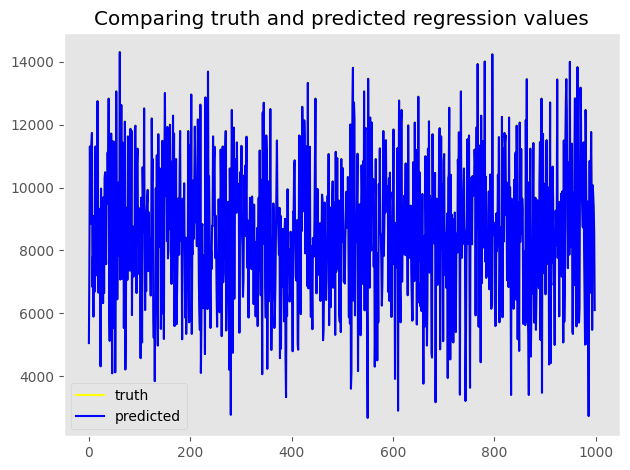

In [ ]:
print("R-squared:", reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, predicted))
make_plot(test_Y, predicted)

In [ ]:
coefficients = reg.coef_
feature_importance = list(zip(train_X, coefficients))
feature_importance.sort(key=lambda x: abs(x[1]))
df_coef = pd.DataFrame(feature_importance, columns=['Features', 'Coefficients'])
print(df_coef)

        Features  Coefficients
0    french_door         240.0
1       bathroom         300.0
2    green_paint         370.0
3   qlm_security         440.0
4        kitchen         500.0
5       backyard         560.0
6    club_access         730.0
7           room        1000.0
8    solar_power        1530.0
9      woodfloor        1890.0
10     furnished        2000.0


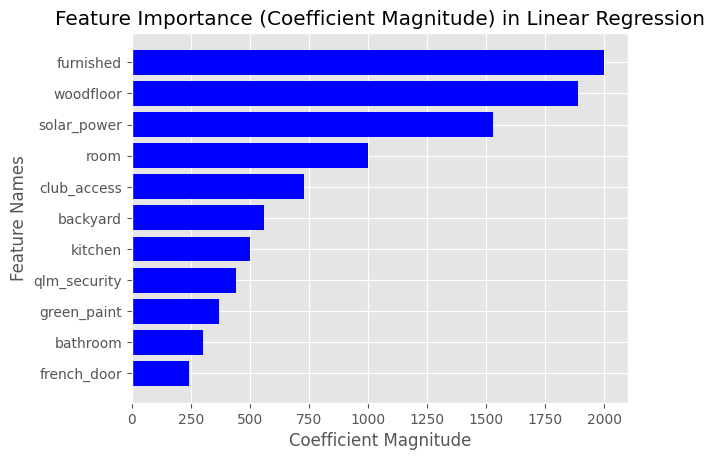

In [ ]:
sorted_feature_names = [x[0] for x in feature_importance]
sorted_coefficients = [x[1] for x in feature_importance]
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, color="blue")
plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature Names')
plt.title('Feature Importance (Coefficient Magnitude) in Linear Regression')
plt.show()

RANDOM FORECT REGRESSION MODEL

R-Squared: 0.9983829453505897
Mean Absolute Error: 174.04304304304304


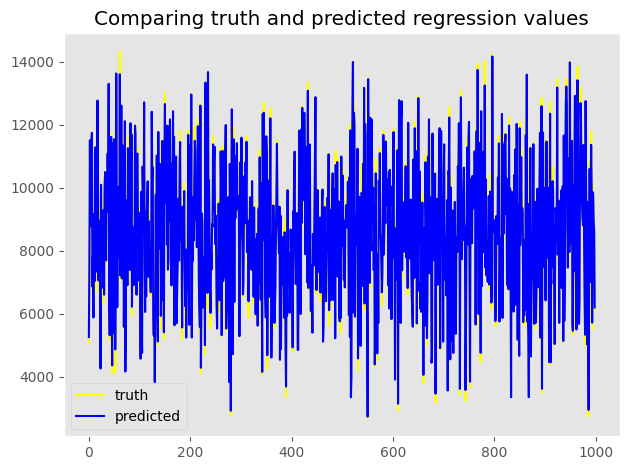

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(train_X, train_Y)
rf_predicted = rf_reg.predict(test_X)
print("R-Squared:", rf_reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, rf_predicted))
make_plot(test_Y, rf_predicted)

COMPUTE FEATURE IMPORTANCE

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': rf_reg.feature_importances_})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=True)
print(feature_importance_df)


         Feature  Importance
1       bathroom    0.004625
6    green_paint    0.006748
9   qlm_security    0.008793
3    french_door    0.008877
2        kitchen    0.011178
4       backyard    0.014610
10   club_access    0.026144
7    solar_power    0.113965
8      woodfloor    0.174853
5      furnished    0.198759
0           room    0.431448


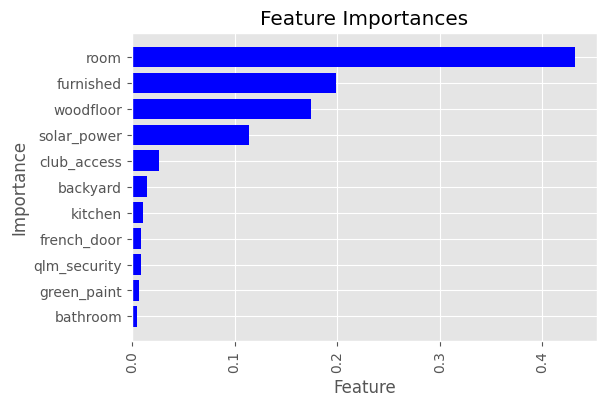

In [ ]:
plt.figure(figsize=(6, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

K-NEAREST NEIGHBORS REGRESSION

R-Squared: 0.9471383275821861
Mean Absolute Error: 471.3446303446304


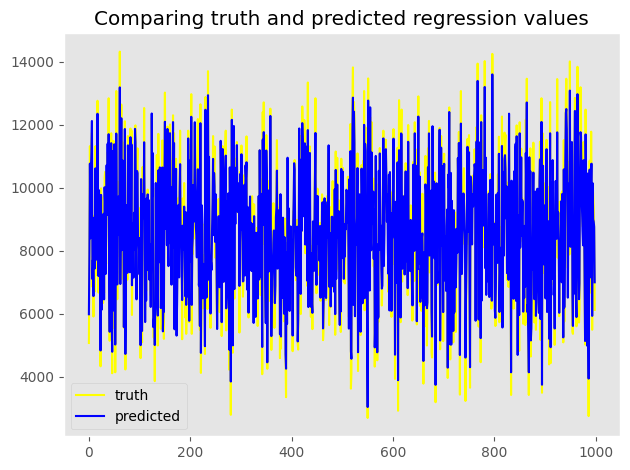

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(train_X, train_Y)
knn_predicted = neigh.predict(test_X)
print("R-Squared:", neigh.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, knn_predicted))
make_plot(test_Y, knn_predicted)

EXTREME GRADIENT BOOSTING (XGBoost)

In [ ]:
import xgboost as xgb
xgb_reg =  xgb.XGBRegressor().fit(train_X, train_Y)
xgb_predicted = xgb_reg.predict(test_X)
print("R-Squared:", xgb_reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, xgb_predicted))
xgb_importances_df = xgb_reg.feature_importances_
xgb_importances_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': xgb_importances_df})
xgb_importances_df = xgb_importances_df.sort_values('Importance', ascending=True)
print("\nFeature Importance with XGBoost:")
print(xgb_importances_df)

R-Squared: 0.9997084329328167
Mean Absolute Error: 60.142959121230604

Feature Importance with XGBoost:
         Feature  Importance
1       bathroom    0.008613
6    green_paint    0.011131
3    french_door    0.011910
2        kitchen    0.014970
9   qlm_security    0.016965
4       backyard    0.019724
10   club_access    0.026595
7    solar_power    0.112140
5      furnished    0.236470
8      woodfloor    0.241706
0           room    0.299776


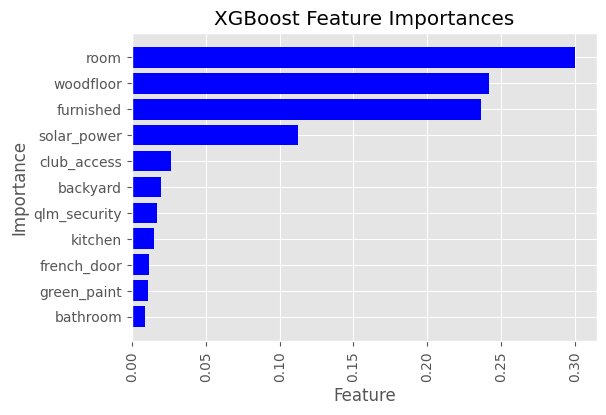

In [ ]:
plt.figure(figsize=(6, 4))
plt.barh(xgb_importances_df['Feature'], xgb_importances_df['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.xticks(rotation=90)
plt.show()

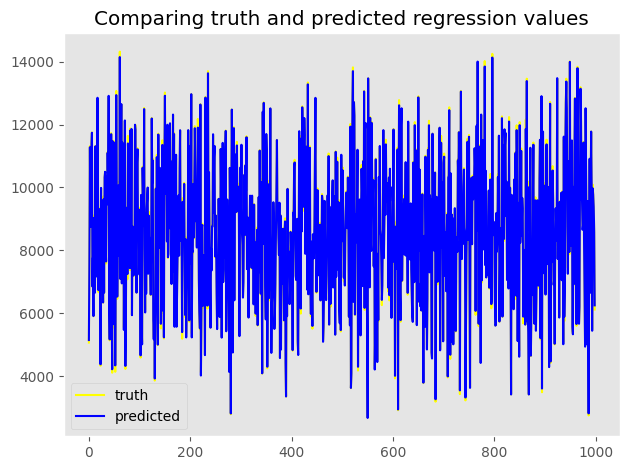

In [ ]:
make_plot(test_Y, xgb_predicted)

SUPPORT VECTOR REGRESSOR

R-Squared: 0.9962465031501758
Mean Squared Error: 93.39683181798132


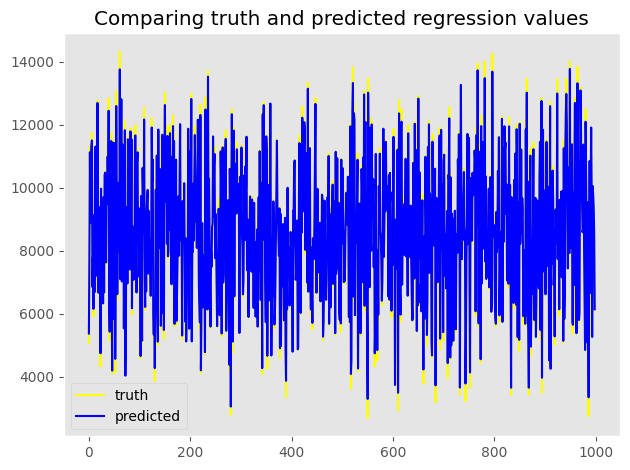

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=90, epsilon=0.8)
svr.fit(train_X, train_Y)
svr_predicted = svr.predict(test_X)
print("R-Squared:", svr.score(train_X, train_Y))
print("Mean Squared Error:", mean_absolute_error(test_Y, svr_predicted))
make_plot(test_Y, svr_predicted)


PLOT MEAN ABSOLUTE VALUE OF ALL THE ALGORITHMS FOR COMPARISM

Text(0.5, 1.0, 'MAE for various regression algorithms')

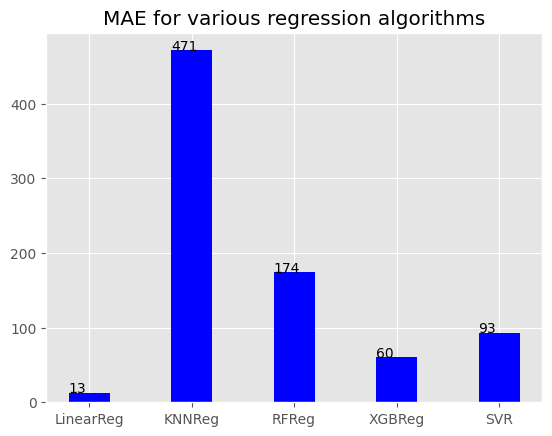

In [ ]:
lin_mae = mean_absolute_error(test_Y, predicted)
knn_mae = mean_absolute_error(test_Y, knn_predicted)
rf_mae = mean_absolute_error(test_Y, rf_predicted)
xgb_mae = mean_absolute_error(test_Y, xgb_predicted)
svr_mae = mean_absolute_error(test_Y, svr_predicted)
mae_values = [lin_mae, knn_mae, rf_mae, xgb_mae, svr_mae]
labels = ["LinearReg", "KNNReg", "RFReg", "XGBReg", "SVR"]
bars = plt.bar(labels, mae_values, width=0.4, color='blue')
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
plt.title("MAE for various regression algorithms")

In [ ]:
Truth = test_Y
Predicted = predicted
difference = [abs(Truth[i] - Predicted[i]) for i in range(len(Truth))]
data = {'Actual Price': Truth, 'Predicted Price': Predicted, 'Price Difference': difference}
df_result = pd.DataFrame(data)
table = tabulate(df_result, headers='keys', tablefmt='grid')
print("Predicted Housing Price vs Actual Housing Price")
print(table)

Predicted Housing Price vs Actual Housing Price
+-----+----------------+-------------------+--------------------+
|     |   Actual Price |   Predicted Price |   Price Difference |
+=====+================+===================+====================+
|   0 |           5068 |              5055 |                 13 |
+-----+----------------+-------------------+--------------------+
|   1 |           7658 |              7645 |                 13 |
+-----+----------------+-------------------+--------------------+
|   2 |          11318 |             11305 |                 13 |
+-----+----------------+-------------------+--------------------+
|   3 |           8858 |              8845 |                 13 |
+-----+----------------+-------------------+--------------------+
|   4 |          11178 |             11165 |                 13 |
+-----+----------------+-------------------+--------------------+
|   5 |          11388 |             11375 |                 13 |
+-----+----------------+----